In [219]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [220]:
fake_df = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')
true_df = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')

In [221]:
fake_df.shape,true_df.shape

((23481, 4), (21417, 4))

In [222]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [223]:
fake_df['Target'] = 'fake'
true_df['Target'] = 'true'

In [224]:
df = pd.concat([fake_df,true_df],ignore_index=True,axis=0)

In [225]:
df.head()

,title,text,subject,date,Target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [226]:
df.tail()

,title,text,subject,date,Target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [227]:
df['text'][0]

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

In [228]:
df['title'][0]

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing'

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

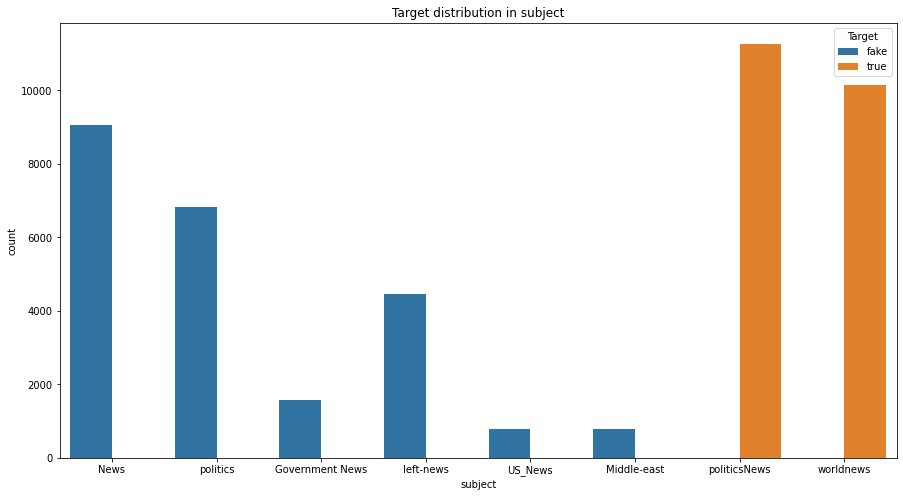

In [230]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data=df,x='subject',hue='Target')
plt.title('Target distribution in subject')
plt.show()

In [231]:
#keep only text + title
df['text'] = df['text'] + " " + df['title']
del df['title']
del df['subject']
del df['date']

In [232]:
df.head(3)

,text,Target
0,Donald Trump just couldn t wish all Americans ...,fake
1,House Intelligence Committee Chairman Devin Nu...,fake
2,"On Friday, it was revealed that former Milwauk...",fake


In [233]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import string


stemmer = PorterStemmer()
lem = WordNetLemmatizer()

In [234]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [235]:
def strip_html(text):
    return re.sub(r'<.*?>','',text)

def remove_brackets(text):
    return re.sub('\[[^]]*\] | \([^)]*\)', '', text)

def remove_url(text):
    return re.sub(r'http\S+', '', text)

def remove_punc(text):
    return re.sub('[^\w\s]','',text)

def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            i = re.sub(r'[^\w]$', '', i)
            i = lemm.lemmatize(i)
            final_text.append(i.strip().lower())
    return " ".join(final_text)




In [236]:
def text_cleaner(text):
    text = strip_html(text)
    text = remove_brackets(text)
    text = remove_url(text)
    text = remove_punc(text)
    text = remove_stopwords(text)
    return text

In [237]:
df['text']=df['text'].apply(text_cleaner)

In [238]:
df['text'][0]

'donald trump wish americans happy new year leave instead give shout enemy hater dishonest fake news medium former reality show star one job country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news media happy healthy new year president angry pants tweeted 2018 great year america country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news media happy healthy new year 2018 great year america donald j trump december 31 2017trump tweet went welll expectwhat kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizen happy new year bishop talbert swan december 31 2017no one like calvin december 31 2017your impeachment would make 2018 great year america also accept regaining control congress miranda yaver december 31 2017do hear talk include many people hate wonder hate alan sandoval december 31 2017who us w

In [239]:
df['text'] = df['text'].str.replace(r'\S*twitter.com\S*', '')
df['text'][0]

'donald trump wish americans happy new year leave instead give shout enemy hater dishonest fake news medium former reality show star one job country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news media happy healthy new year president angry pants tweeted 2018 great year america country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news media happy healthy new year 2018 great year america donald j trump december 31 2017trump tweet went welll expectwhat kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizen happy new year bishop talbert swan december 31 2017no one like calvin december 31 2017your impeachment would make 2018 great year america also accept regaining control congress miranda yaver december 31 2017do hear talk include many people hate wonder hate alan sandoval december 31 2017who us w

In [240]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.text)

In [242]:
corpus[0:10]

['donald',
 'trump',
 'wish',
 'americans',
 'happy',
 'new',
 'year',
 'leave',
 'instead',
 'give']

In [243]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'said': 130149,
 'trump': 127329,
 'us': 59038,
 'would': 55231,
 'president': 54110,
 'people': 41681,
 'state': 40507,
 'one': 37162,
 'year': 33528,
 'new': 32487}

In [244]:
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer,CountVectorizer

In [246]:
df.text[0:2]

0    donald trump wish americans happy new year lea...
1    house intelligence committee chairman devin nu...
Name: text, dtype: object

In [277]:
x = df['text']
y = df['Target']
x.shape

(44898,)

In [278]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)

In [279]:
transformer = TfidfTransformer()
x = transformer.fit_transform(X)

In [280]:
x.shape

(44898, 214416)

In [281]:
y = y.replace({'fake':0,'true':1})

In [295]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [283]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=28)

In [310]:
def plot(fpr,pr,roc_auc,title=' '):
    plt.title('Test ROC_CURVE: '+title)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [311]:
def plot_heat(c):
    cdf = pd.DataFrame(c , index = ['Fake','Original'] , columns = ['Fake','Original'])
    plt.figure(figsize = (10,10))
    sns.heatmap(cdf,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

score: 0.9773570898292502
auc_score: 0.9771588037961465
Confusion_matrix:
 [[6903  129]
 [ 176 6262]]


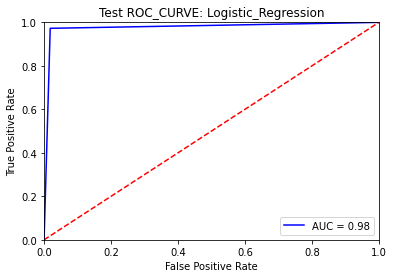

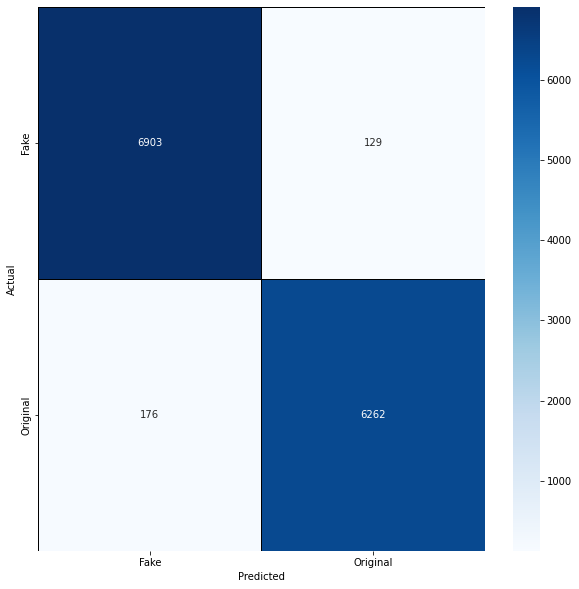

In [312]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print('score:',lr.score(x_test,y_test))
print('auc_score:',roc_auc_score(y_test,pred))
print('Confusion_matrix:\n',confusion_matrix(y_test,pred))
fpr, tpr, threshold =roc_curve(y_test, pred)
roc_auc = roc_auc_score(y_test,pred)
plot(fpr,tpr,roc_auc,'Logistic_Regression')
plot_heat(confusion_matrix(y_test,pred))

score: 0.9802524127691166
auc_score: 0.9803385826688168
Confusion_matrix:
 [[6880  152]
 [ 114 6324]]


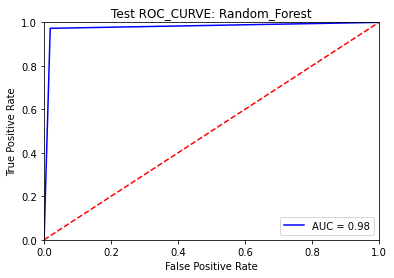

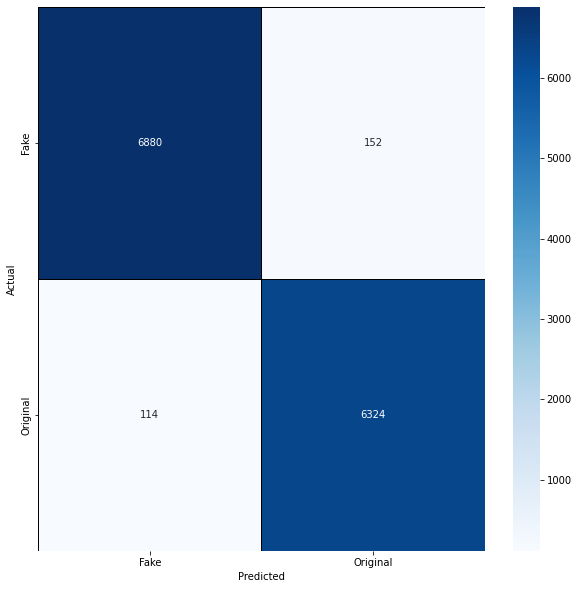

In [314]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print('score:',rf.score(x_test,y_test))
print('auc_score:',roc_auc_score(y_test,pred))
print('Confusion_matrix:\n',confusion_matrix(y_test,pred))
plot(fpr,tpr,roc_auc,'Random_Forest')
plot_heat(confusion_matrix(y_test,pred))

In [288]:
svm = SVC()
svm.fit(x_train,y_train)
pred = svm.predict(x_test)
print('score:',svm.score(x_test,y_test))
print('auc_score:',roc_auc_score(y_test,pred))
print('Confusion_matrix:\n',confusion_matrix(y_test,pred))


score: 0.9849294729027468
auc_score: 0.9848246651971495
Confusion_matrix:
 [[6942   90]
 [ 113 6325]]


score: 0.9907943578322197
auc_score: 0.9907567403227637
Confusion_matrix:
 [[6973   59]
 [  65 6373]]


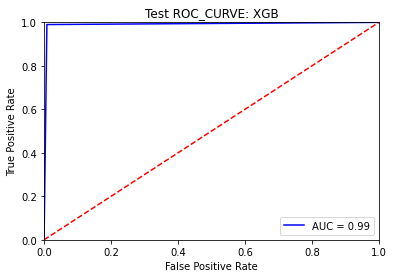

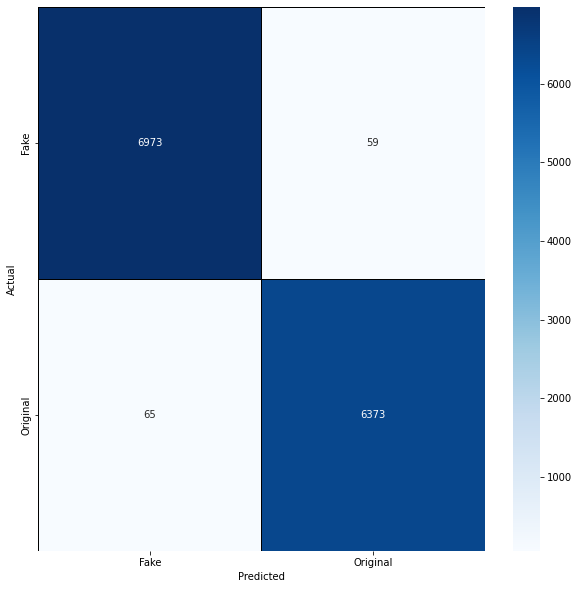

In [328]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
pred = xgb.predict(x_test)
print('score:',xgb.score(x_test,y_test))
print('auc_score:',roc_auc_score(y_test,pred))
print('Confusion_matrix:\n',confusion_matrix(y_test,pred))
fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = roc_auc_score(y_test,pred)
plot(fpr,tpr,roc_auc,'XGB')
plot_heat(confusion_matrix(y_test,pred))